0：黑色，255：白色,理解为亮度值；

直方图技术法通过选出直方图中的两峰顶间的最小峰谷作为阈值。

方法同THRESH_TRIANGLE：三角法是将最高峰顶置于图像亮侧，连接原点与峰顶，选择直方图距离这条连线的最远点就为峰谷，及阈值。

原理：

In [1]:
import numpy as np

def calcGrayHist(image):
    #灰度图像矩阵的高，宽
    rows,cols = image.shape
    #存储灰度直方图
    grayHist = np.zeros([256],np.uint64)
    for r in xrange(rows):
        for c in xrange(cols):
            grayHist[image[r][c]] +=1 #这里应该指的是，image[r][c]对应灰度数值，在grayHist上+1
    return grayHist

def threshTwoPeaks(image):
    #计算灰度直方图
    histogram = calcGrayHist(image)
    #找最大峰顶
    maxLoc = np.where(histogram==np.max(histogram))
    firstPeak = maxLoc[0][0]
    #寻找第二个峰值对应的灰度值
    measureDists = np.zeros([256],np.float32)
    for k in xrange(256):
        measureDists[k] = pow(k-firstPeak,2)*histogram[k]
    maxLoc2 = np.where(measureDists==np.max(measureDists))
    secondPeak = maxLoc2[0][0]
    #找到两个峰值间的最小值对应的灰度值
    thresh = 0 #先给thresh赋值，不然无定义
    if firstPeak > secondPeak:
        temp = histogram[int(secondPeak):int(firstPeak)]
        minLoc = np.where(temp == np.min(temp))
        thresh = secondPeak + minLoc[0][0] + 1
    else:
        temp = histogram[int(firstPeak):int(secondPeak)]
        minLoc = np.where(np.min(temp))
        thresh = firstPeak + minLoc[0][0] + 1
    #找到阈值后，对图像进行阈值化处理
    threshImage_out = image.copy()#把src拷贝一份
    threshImage_out[threshImage_out>thresh]=255
    threshImage_out[threshImage_out<=thresh]=0
    return (thresh,threshImage_out)

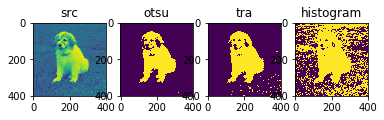

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("img7.jpg",0)

#otsu
the_otsu = 0
the_otsu,dst_otsu = cv2.threshold(src,the_otsu,255,8)

#triangle
the_tra = 0
the_tra,dst_tra = cv2.threshold(src,the_tra,255,16)

#histogram
the_hist = 0
the_hist,dst_hist = threshTwoPeaks(src)

titles = ["src","otsu","tra","histogram"]
images = [src,dst_otsu,dst_tra,dst_hist]
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
plt.show()


讲道理，otsu自动计算的更好